In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Opening the file and saving it as a pandas dataframe.
filepath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(filepath)

In [ ]:
# Defining a new column 'new_status' and combine 'Charged Off' and 'Default' as well as any 'late' loans into one status

df['new_status'] = df['loan_status']
df.loc[df['loan_status']=='Late (31-120 days)', 'new_status'] = 'Default'
df.loc[df['loan_status']=='In Grace Period', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Late (16-30 days)', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Charged Off', 'new_status'] = 'Default'
df.loc[df['loan_status']=='Does not meet the credit policy. Status:Fully Paid', 'new_status'] = 'Fully Paid'
df.loc[df['loan_status']=='Does not meet the credit policy. Status:Charged Off', 'new_status'] = 'Default'


df.drop(columns='loan_status', inplace=True)

#Dropping loans which are 'Current'


total = len(df)

plt.figure(figsize = (8,6))

ax = sns.countplot(x="new_status", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Loan Status Categories", fontsize=12)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
ax.set_ylim(0, max(sizes) * 1.10)

plt.show()


In [ ]:
# Extracting year
df["issue_year"] = df["issue_d"].str[4:]

In [ ]:
defaulL= df.loc[df['new_status']=='Default', ['issue_year']].value_counts()
fullL= df.loc[df['new_status']=='Fully Paid', ['issue_year']].value_counts()
currentL = df.loc[df['new_status']=='Current', ['issue_year']].value_counts()
s = pd.DataFrame({'Fully Paid': fullL, 'Default': defaulL, 'Current': currentL})
s = s.fillna(0)
s['Total'] = s['Default'] + s['Fully Paid'] + s['Current']

listIndex = s.index

new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new
#s.index = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(s.index, s['Fully Paid'])
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'])
ax.bar(s.index, s['Current'], bottom=s['Fully Paid']+ s['Default'])

ax.set_xticklabels(s.index)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.legend(['Fully Paid', 'Default', 'Current'])
ax.set_title("Annual Loan Status Distribution", fontsize=20)

#s_total=s['Total']
#s = s.iloc[:, 0:2]
#s_rel = s.div(s_total, 0)*100
#n = 'Default'
#for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
 #   plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()

In [ ]:
df['new_status'].value_counts()

In [ ]:
defaulL= df.loc[df['new_status']=='Default', ['issue_year']].value_counts()
fullL= df.loc[df['new_status']=='Fully Paid', ['issue_year']].value_counts()
currentL = df.loc[df['new_status']=='Current', ['issue_year']].value_counts()
s = pd.DataFrame({'Fully Paid': fullL, 'Default': defaulL, 'Current': currentL})

In [ ]:
s

In [ ]:
currentL

In [ ]:
# Plotting the distribution of the year
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x="issue_year", data=df, ax=ax, order=["2007", '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], color='teal')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('count', fontsize=15)
ax.set_title("Number of loans granted vs year", fontsize=20)

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [ ]:
s = pd.DataFrame({'Fully Paid': df.loc[df['new_status']=='Fully Paid', ['home_ownership']].value_counts(), 'Default': df.loc[df['new_status']=='Default', ['home_ownership']].value_counts()})
s['Total'] = s['Default'] + s['Fully Paid']
listIndex = s.index

new = []
for item in listIndex:
    new.append(''.join(item))
s.index = new
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(s.index, s['Fully Paid'], color="teal")
ax.bar(s.index, s['Default'], bottom=s['Fully Paid'], color="darkturquoise")
ax.set_xticklabels(s.index, rotation=45)
ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Residence type', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status vs home ownership", fontsize=20)


s_total=s['Total']
s = s.iloc[:, 0:2]

s_rel = s.div(s_total, 0)*100

n = 'Default'
for i, (cs, pc) in enumerate(zip(s.cumsum(1)[n], s_rel[n])):
    plt.text(i, cs, str(np.round(pc, 1)) + '%', va='bottom', ha='center')

plt.show()  

In [ ]:
keeplist =['revol_util','dti', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'inq_last_6mths', 'earliest_cr_line', 
        'open_acc', 'mort_acc', 'annual_inc', 'issue_d','sub_grade', 'funded_amnt', 'installment', 'int_rate', 
        'term', 'revol_bal', 'fico_range_high', 'fico_range_low', 'emp_length', 'home_ownership',
        'num_rev_accts', 'mths_since_last_major_derog', 'open_act_il', 'pub_rec_bankruptcies', 'tax_liens']
missing1 = df[keeplist].isnull().sum()
missing2 = 100*df[keeplist].isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']

In [ ]:
missing.sort_values(by='%', ascending=False)[0:50]

In [ ]:
# Check for missing data

plt.figure(figsize=(10,6))
sns.heatmap(df[keeplist].isna(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
dff =df

dff =dff[ dff['application_type'] == "Individual"]
keeplist =['revol_util','dti', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'inq_last_6mths', 'earliest_cr_line', 
        'mort_acc', 'annual_inc', 'issue_d', 'grade', 'sub_grade', 'funded_amnt',  'installment', 'int_rate', 
        'verification_status', 'term', 'revol_bal', 'fico_range_high', 'fico_range_low', 'id', 'emp_length', 'home_ownership',
        'num_rev_accts', 'pub_rec_bankruptcies', 'tax_liens', 'addr_state']
dff = dff[keeplist]
#dff.drop(columns=['mths_since_last_major_derog', 'open_act_il'], inplace= True)


s1 = pd.DataFrame({'Fully Paid': dff.loc[dff['new_status']=='Fully Paid', 'fico_range_low'], 'Default': dff.loc[dff['new_status']=='Default', 'fico_range_low']}, index=None)

fig, ax = plt.subplots(figsize=(10,8))

ax.hist(s1, stacked=True, bins=20, rwidth=0.85)

ax.legend(['Fully Paid', 'Default'])
ax.set_xlabel('Fico score', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title("Loan status distribution vs Fico score ", fontsize=16)
ax.set_ylim(0,400000)


p = ax.patches
for i in range(0,20,1):
    x1, y1 = p[i].get_xy()
    x2, y2 = p[i+1].get_xy()
    x = x1 + 2
    Y1 = p[i].get_height()
    Y2 = p[i+20].get_height()
    y = Y2 + Y1 + 5000
    a = Y2/(Y2 + Y1)
    ax.text(x, y, round(a*100,1), rotation=90)
    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Opening the file and saving it as a pandas dataframe.
filepath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(filepath)
mask = df['application_type'] == "Individual"
dff = df[mask]
drop_list=['hardship_payoff_balance_amount', 'hardship_last_payment_amount','disbursement_method', 'debt_settlement_flag',
           'debt_settlement_flag_date', 'settlement_status', 'settlement_date','settlement_amount', 'settlement_percentage',
           'settlement_term', 'annual_inc_joint', 'dti_joint','last_fico_range_high', 'last_fico_range_low', 'total_rec_late_fee',
           'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
           'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
           'sec_app_fico_range_high','sec_app_earliest_cr_line', 'sec_app_inq_last_6mths','sec_app_mort_acc', 'sec_app_open_acc',
           'sec_app_revol_util','sec_app_open_act_il', 'sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths',
           'sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
           'hardship_reason', 'hardship_status', 'deferral_term','hardship_amount', 'hardship_start_date', 'hardship_end_date',
           'payment_plan_start_date', 'hardship_length', 'hardship_dpd','hardship_loan_status', 'orig_projected_additional_accrued_interest',
           'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag','debt_settlement_flag_date', 
           'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'member_id', 'revol_bal_joint',
           'sec_app_fico_range_low' ]
dff.drop(columns=drop_list, axis=1, inplace=True)


In [ ]:
column_desc = pd.read_excel( 'https://resources.lendingclub.com/LCDataDictionary.xlsx', index_col= 'LoanStatNew')
column_desc = column_desc.iloc[:,0:1]

In [21]:
missing1 = dff.isnull().sum()
missing2 = 100*dff.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']

In [22]:
null_list = missing.sort_values(by='%', ascending=False)[0:25].index
dff.drop(columns=null_list, axis=1, inplace=True)
dff.shape

(2139958, 72)

In [ ]:
dff.columns

In [23]:
drppp = ['policy_code', 'application_type',  'verification_status', 'pymnt_plan', 'url', 'purpose', 
'title', 'zip_code', 'addr_state', 'initial_list_status', 'id'] 
dff.drop(columns=drppp, axis=1, inplace=True)


In [24]:
dff = dff.dropna()

In [25]:
dff.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [26]:
df['home_ownership'].replace(['ANY', 'NONE'], 'OTHER', inplace=True)
df['home_ownership'].value_counts()

MORTGAGE    1111450
RENT         894929
OWN          253057
OTHER          1232
Name: home_ownership, dtype: int64

In [27]:
dff['fico_score'] = np.mean([dff['fico_range_high'], dff['fico_range_low']])


In [28]:
dff['Credit Length (year)'] = (pd.to_datetime(dff['issue_d'])-pd.to_datetime(dff['earliest_cr_line']))/np.timedelta64(1,'Y')


In [ ]:
dff.columns

In [29]:
dff.drop(columns=['fico_range_low', 'fico_range_high', 'issue_d', 'earliest_cr_line'], axis=1, inplace=True)


In [30]:
mask = dff['loan_status'] != "Current"
dff = dff[mask]
dff['loan_status'].value_counts()

Fully Paid            936406
Charged Off           229762
Late (31-120 days)     17579
In Grace Period         6820
Late (16-30 days)       3445
Default                   28
Name: loan_status, dtype: int64

In [31]:
dff['loan_status'].replace(['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'], 'Default', inplace=True)

In [32]:
dff['loan_status'].value_counts()

Fully Paid    936406
Default       257634
Name: loan_status, dtype: int64

In [34]:
dff.shape

(1194040, 59)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

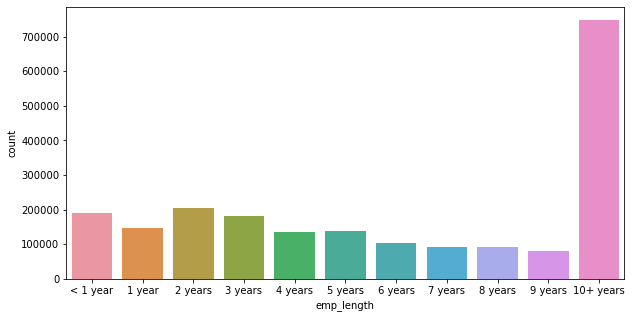

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="emp_length", data=df, ax=ax, order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years',
                                                    '7 years', '8 years', '9 years', '10+ years'])

In [36]:
dff['emp_length'].replace('< 1 year', '1 year down', inplace=True)
dff['emp_length'].replace('10+ years', '10 years up', inplace=True)
dff['emp_length'].value_counts()

10 years up    423589
2 years        114607
3 years        101385
1 year down     96959
1 year          83337
5 years         78290
4 years         74896
6 years         58508
8 years         57864
7 years         56107
9 years         48498
Name: emp_length, dtype: int64

In [37]:
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn import tree, metrics
from IPython.display import Image  
import pydotplus

from xgboost import XGBClassifier, cv, plot_importance
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_recall_curve, accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

from sklearn.metrics import fbeta_score, make_scorer

import itertools

import warnings
warnings.filterwarnings('ignore')

from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer

import datetime

import pickle


In [52]:
dff.columns

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens'

In [ ]:
dff.dtypes

In [38]:
dff = dff.reset_index()

In [39]:
gframe = dff

In [51]:
gframe.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_score,Credit Length (year)
0,0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10 years up,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,699.351508,12.334271
1,1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10 years up,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,699.351508,16.000329
2,4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,699.351508,17.500702
3,5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,...,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,699.351508,28.167587
4,6,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,10 years up,...,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,699.351508,25.500866


In [85]:
y = dff['loan_status']
X = dff.drop(columns=['loan_status', 'sub_grade', 'index'])

# Choose the categorical columns
col_num =X.shape[1]
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X)

# One Hot encode

enc = OneHotEncoder(drop='if_binary')
enc_df = pd.DataFrame(enc.fit_transform(X[categorical_columns]).toarray())
feature_names = enc.get_feature_names(input_features=categorical_columns)
enc_df.columns = feature_names
X.drop(columns=categorical_columns, inplace=True)
# merge with main df bridge_df on key values
X =X.join(enc_df)
#X.set_index('id', inplace=True)
print('The new X has the columns added by One Hot Encoder, which has increased the number of columns from {} to {}'.format(col_num, X.shape[1]))

Xcol_names = X.columns
ycol_name =['Status']

# Undersample
Xn = X.to_numpy()
yn = y.to_numpy()
random_state=42
RU = RandomUnderSampler()
X_res, y_res = RU.fit_resample(Xn,yn)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=47)

# Change back to panads dataframe
X_train = pd.DataFrame(X_train, columns=Xcol_names)
X_test = pd.DataFrame(X_test, columns=Xcol_names)
y_train = pd.DataFrame(y_train, columns=ycol_name)
y_test = pd.DataFrame(y_test, columns=ycol_name)



The new X has the columns added by One Hot Encoder, which has increased the number of columns from 57 to 78


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold


In [87]:
pipe = make_pipeline( 
    MinMaxScaler(),
    LogisticRegression()
)

lr_cv_results = cross_validate(pipe, X_train, y_train, scoring = 'balanced_accuracy', cv=5)
lr_cv_scores = lr_cv_results['test_score']

print('Balanced accuaracy scores of 5 fold logistic regression are: ', lr_cv_scores)
print('Mean and standard deviation of balanced accuaracy scores of 5 fold logistic regression is: ', lr_cv_scores.mean(),  ' ,' , lr_cv_scores.std())

Balanced accuaracy scores of 5 fold logistic regression are:  [0.65783637 0.65696304 0.65731848 0.65723533 0.6557109 ]
Mean and standard deviation of balanced accuaracy scores of 5 fold logistic regression is:  0.6570128247255248  , 0.0007097380838132517


In [90]:
grid_params = {'logisticregression__penalty': ['l1','l2'], 'logisticregression__C': [0.1,100,]}

# Perform grid search
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, scoring = 'balanced_accuracy', n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 100],
                         'logisticregression__penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [92]:
model_features = pd.DataFrame(lr_grid_cv.best_estimator_.named_steps.logisticregression.coef_.T)
model_features.index = X.columns
model_features.columns=['Importance']

In [95]:
model_features.index

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limi

Text(43.401553819444445, 0.5, 'Feature')

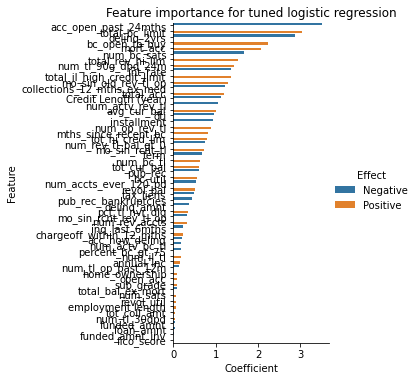

In [96]:
model_features = pd.DataFrame(lr_grid_cv.best_estimator_.named_steps.logisticregression.coef_.T)
model_features.index = X.columns
model_features.columns=['Importance']

HO = model_features.loc['home_ownership_ANY':,:]
HO = pd.DataFrame({'Importance': HO.mean()})
HO.index = ['home_ownership']

Emp = model_features.loc['emp_length_1 year':'emp_length_9 years', :]
Emp = pd.DataFrame({'Importance': Emp.mean()})
Emp.index = ['employment length']

Sub = model_features.loc['grade_A':'grade_G', :]
sub = pd.DataFrame({'Importance': Sub.mean()})
sub.index = ['sub_grade']

#VS = model_features.loc['verification_status_Not Verified':'verification_status_Verified', :]
#vs = pd.DataFrame({'Importance': VS.mean()})
#vs.index = ['Verification status']

term = pd.DataFrame({'Importance': model_features.loc['term_ 60 months',:]})
term.index = ['term']

model_features = pd.concat([model_features.loc[:'Credit Length (year)',:], term, HO, Emp, sub])
title = 'Feature importance for tuned logistic regression'
model_features['Effect'] = 'Positive'
model_features.loc[model_features['Importance'] < 0, 'Effect'] = 'Negative'
model_features['Absolute effect'] = abs(model_features['Importance'])
data = model_features.sort_values(by='Absolute effect', ascending=False)

# Plot feature importance
sns.catplot(y= data.index, x='Absolute effect', hue='Effect', kind='bar', data=data)
plt.title(title)
plt.xlabel('Coefficient')
plt.ylabel('Feature')

Text(25.100776909722242, 0.5, 'Feature')

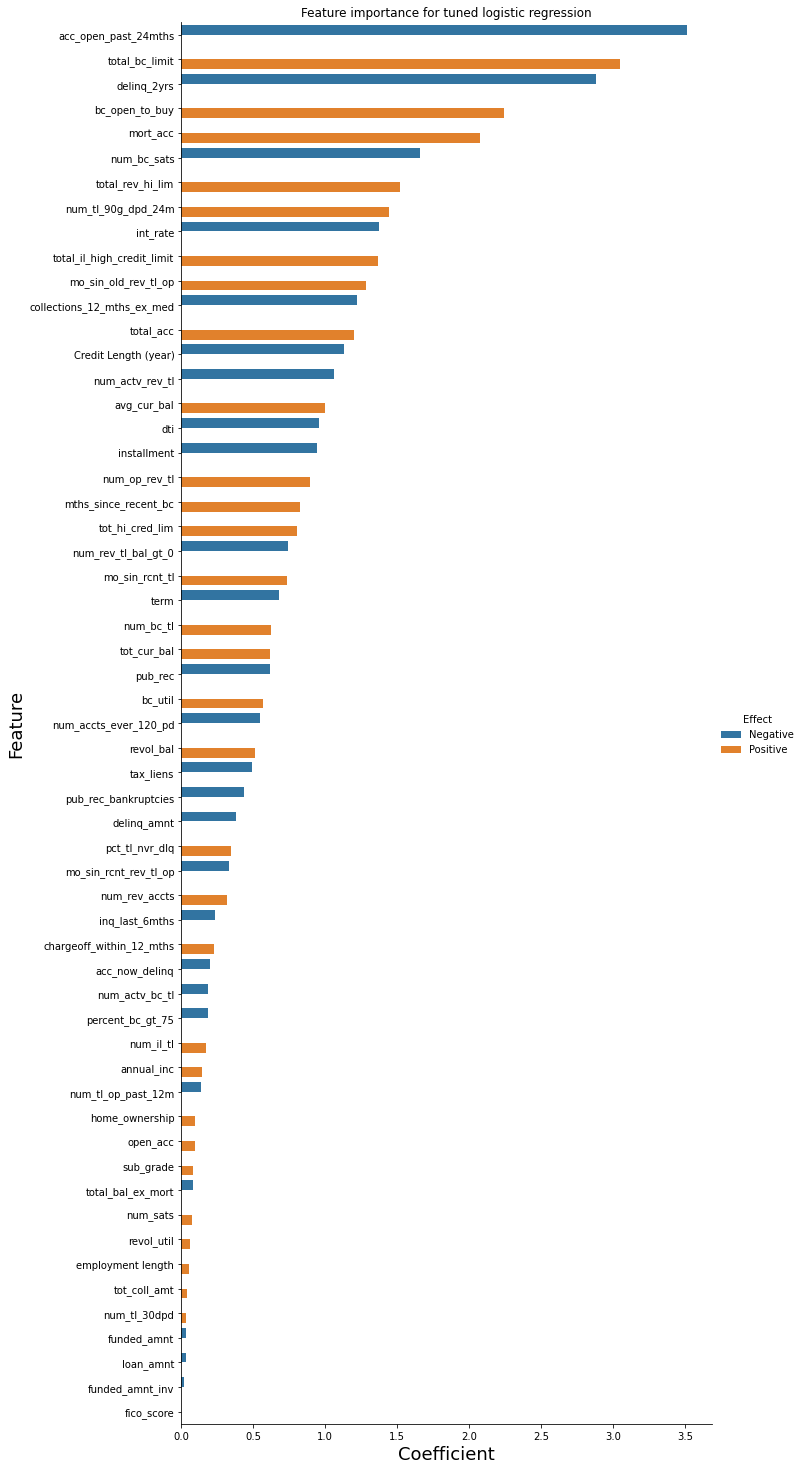

In [106]:
# Plot feature importance
sns.catplot(y= data.index, x='Absolute effect', hue='Effect', kind='bar', data=data, height=20, aspect=0.5)
plt.title(title)
plt.xlabel('Coefficient', fontsize=18)
plt.ylabel('Feature', fontsize=18)